In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
train_source = 'dataset/adult_preprocessed.csv'

test_source = 'dataset/adult_test_preprocessed.csv'


In [29]:
train_data = pd.read_csv(train_source, sep=r'\s*,\s*', engine='python')
test_data = pd.read_csv(test_source, sep=r'\s*,\s*', engine='python')


In [30]:
# Classify attributes into numbers and strings
def category_attribute(dataset, list, num_list, str_list): 
    for attribute in list:
        #print(feature, type(dataset[feature][1]))
        if type(dataset[attribute][1]) == str:
            str_list.append(attribute)
        else:
            num_list.append(attribute)
    return num_list, str_list

numerical_attribute_list = []
str_attribute_list = []

attribute_list = pd.read_csv(train_source, nrows=0)
print(attribute_list)
numerical_attribute_list, str_attribute_list = category_attribute(train_data, attribute_list, numerical_attribute_list, str_attribute_list)

Empty DataFrame
Columns: [age, workclass, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


In [31]:
# train_data normalization
le=LabelEncoder()
for i in str_attribute_list:
    train_data[i]=le.fit_transform(train_data[i])
#print(train_data)

# test_data normalization
le=LabelEncoder()
for i in str_attribute_list:
    test_data[i]=le.fit_transform(test_data[i])
#print(train_data)

In [32]:
# split data & label (train)
x_train = train_data.iloc[:,0:13]
y_train = train_data.iloc[:,13]
# split data & label (test)
x_test = test_data.iloc[:,0:13]
y_test = test_data.iloc[:,13]

In [33]:
#standardizing the input feature
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train
x_test = sc.fit_transform(x_test)
x_test

array([[-1.02900513, -0.222347  , -2.42343884, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       [-0.05742253, -0.222347  ,  0.19017232, ..., -0.2191694 ,
         0.75013125,  0.26058067],
       [-0.80479376, -1.25712632, -0.85527215, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       ...,
       [-0.05742253, -0.222347  , -0.33254991, ..., -0.2191694 ,
         0.75013125,  0.26058067],
       [ 0.39100021, -0.222347  , -0.33254991, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       [-0.2816339 ,  0.81243231, -0.33254991, ..., -0.2191694 ,
         1.57915155,  0.26058067]])

In [34]:
# define the keras model
mlp = Sequential()
mlp.add(Dense(16, input_shape=(13,), activation='relu'))
mlp.add(Dense(12, activation='relu'))
mlp.add(Dense(8, activation='relu'))
mlp.add(Dense(1, activation='sigmoid'))

In [35]:
# compile the keras model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# fit the keras model on the dataset
mlp.fit(x_train,y_train, batch_size=10, epochs=50)

Epoch 1/50


3017/3017 [==============================] - 2s 691us/step - loss: 0.3765 - accuracy: 0.8269
Epoch 2/50
3017/3017 [==============================] - 2s 695us/step - loss: 0.3386 - accuracy: 0.8394
Epoch 3/50
3017/3017 [==============================] - 2s 682us/step - loss: 0.3344 - accuracy: 0.8422
Epoch 4/50
3017/3017 [==============================] - 2s 668us/step - loss: 0.3318 - accuracy: 0.8425
Epoch 5/50
3017/3017 [==============================] - 2s 656us/step - loss: 0.3299 - accuracy: 0.8428
Epoch 6/50
3017/3017 [==============================] - 2s 669us/step - loss: 0.3276 - accuracy: 0.8453
Epoch 7/50
3017/3017 [==============================] - 2s 690us/step - loss: 0.3270 - accuracy: 0.8451
Epoch 8/50
3017/3017 [==============================] - 2s 794us/step - loss: 0.3256 - accuracy: 0.8465
Epoch 9/50
3017/3017 [==============================] - 2s 660us/step - loss: 0.3252 - accuracy: 0.8469
Epoch 10/50
3017/3017 [==============================] - 2s 688us/step - lo

In [43]:
#mlp.predict(x_test)
y_pred=mlp.predict(x_test)
print(y_pred)
y_pred_new =(y_pred>0.5)
y_pred_new

471/471 [==============================] - 0s 467us/step
[[0.00093084]
 [0.4528739 ]
 [0.38796607]
 ...
 [0.7286344 ]
 [0.06004985]
 [0.785199  ]]


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [38]:
cm = confusion_matrix(y_test, y_pred_new)
print(cm)

[[10410   950]
 [ 1377  2323]]


In [39]:
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy = accuracy_score(y_test, y_pred_new)

# Precision: TP / (TP + FP)
precision = precision_score(y_test, y_pred_new)

# Recall: TP / (TP + FN)
recall = recall_score(y_test, y_pred_new)

# F1-score: (2 * Precision * Recall) / (Precision + Recall))
f1_score = f1_score(y_test, y_pred_new)

# AUC 需要原始的預測概率(y_pred)而不是二元的預測結果(y_pred_new)
# 假設 y_pred 是模型預測的概率值
auc = roc_auc_score(y_test, y_pred)

def res_print():
    Item = ['Accurancy', 'Precision', 'Recall', 'F1-score', 'AUC']
    Value = [accuracy, precision, recall, f1_score, auc]
    for i in range(len(Item)):
        print((Item[i] + ':').rjust(10), "%.3f" % Value[i])
res_print()

Accurancy: 0.845
Precision: 0.710
   Recall: 0.628
 F1-score: 0.666
      AUC: 0.901


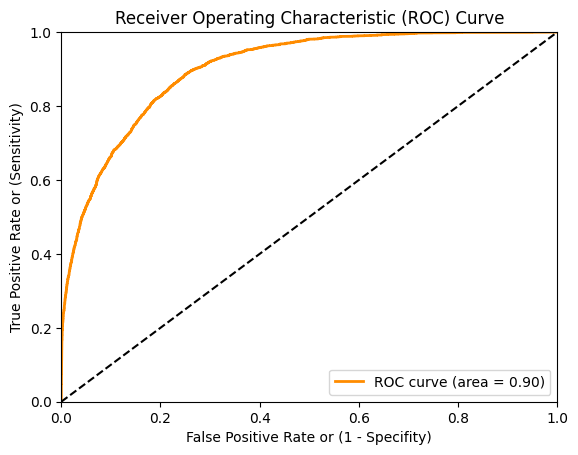

In [40]:
# AUC 需要原始的預測概率(y_pred)而不是二元的預測結果(y_pred_new)
# 假設 y_pred 是模型預測的概率值
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# 繪製 ROC 曲線
def plot_roc_curve(fpr, tpr): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)' % auc) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

plot_roc_curve(fpr, tpr)
plt.show()

In [41]:
source_list_num = ['5', '10', '50', '200', '500', '1000']
source_list_mode = ['mean', 'median', 'mode']
category = ''

for k in source_list_num:
    for m in source_list_mode:
        train_source = 'dataset/k_anonymity/adult_k-anonymity_'+ k +'_'+ m +'.csv'

        output_file = 'dataset/evalution.csv'
        
        category = category + ('k = ' + k).ljust(10) + '\n' + 'Generalization_mode : ' + m

        

        def res_print(category):
            Item = ['Accurancy', 'Precision', 'Recall', 'F1-score', 'AUC']
            Value = [accuracy, precision, recall, f1_score, auc]
            for i in range(len(Item)):
                category = category + '\n' + (Item[i] + ':').rjust(10) + str("%.3f" % Value[i])
            #print(category)
            category = category + '\n'
            return category
        category = res_print(category)

# Write as new CSV file 
    with open(output_file, 'w') as file:
        file.write(category)